In [38]:
import numpy as np
from kmeans import AnchorKmeans
from datasets import AnnotParser
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

plt.style.use('ggplot')

In [39]:
print('[INFO] Load datas')
# xml的路径
annot_dir = "annotations"
parser = AnnotParser('xml')
boxes = parser.parse_xml(annot_dir)
print(boxes)
print('boxes shape : {}'.format(boxes.shape))

[INFO] Load datas
[[0.3890625  0.1625    ]
 [0.328125   0.09375   ]
 [0.04583333 0.10625   ]
 ...
 [0.11458333 0.0859375 ]
 [0.18541667 0.0890625 ]
 [0.17083333 0.03125   ]]
boxes shape : (4989, 2)


In [52]:
print('[INFO] Run anchor k-means with k = 2,3,...,10')
results = {}
maxk = 20
for k in range(2, maxk):
    model = AnchorKmeans(k, random_seed=333)
    model.fit(boxes)
    avg_iou = model.avg_iou()
    results[k] = {'anchors': model.anchors_, 'avg_iou': avg_iou}
    print("K = {}, Avg IOU = {:.4f}".format(k, avg_iou))

[INFO] Run anchor k-means with k = 2,3,...,10
K = 2, Avg IOU = 0.4487
K = 3, Avg IOU = 0.4943
K = 4, Avg IOU = 0.5400
K = 5, Avg IOU = 0.5655
K = 6, Avg IOU = 0.5865
K = 7, Avg IOU = 0.6074
K = 8, Avg IOU = 0.6302
K = 9, Avg IOU = 0.6432
K = 10, Avg IOU = 0.6552
K = 11, Avg IOU = 0.6680
K = 12, Avg IOU = 0.6775
K = 13, Avg IOU = 0.6853
K = 14, Avg IOU = 0.6913
K = 15, Avg IOU = 0.6987
K = 16, Avg IOU = 0.7084
K = 17, Avg IOU = 0.7159
K = 18, Avg IOU = 0.7191
K = 19, Avg IOU = 0.7250


[INFO] Plot average IOU curve


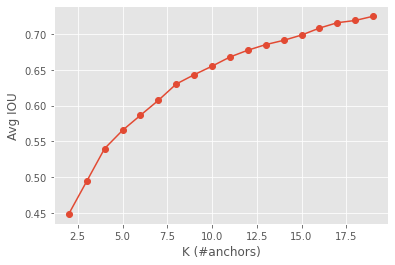

In [53]:
print('[INFO] Plot average IOU curve')
plt.figure()
plt.plot(range(2, maxk), [results[k]["avg_iou"] for k in range(2, maxk)], "o-")
plt.ylabel("Avg IOU")
plt.xlabel("K (#anchors)")
plt.show()

In [54]:
print('[INFO] The result anchors:')
best_k = 6
anchors = results[best_k]['anchors']
print(anchors)

[INFO] The result anchors:
[[0.51200299 0.23813556]
 [0.24187866 0.27790654]
 [0.36868524 0.10342567]
 [0.82728358 0.30149357]
 [0.10597548 0.06624391]
 [0.10839901 0.1983257 ]]


[INFO] Visualizing anchors
[[-153  -71  307  143]
 [ -72  -83  145  167]
 [-110  -31  221   62]
 [-248  -90  496  181]
 [ -32  -20   64   40]
 [ -32  -59   65  119]]


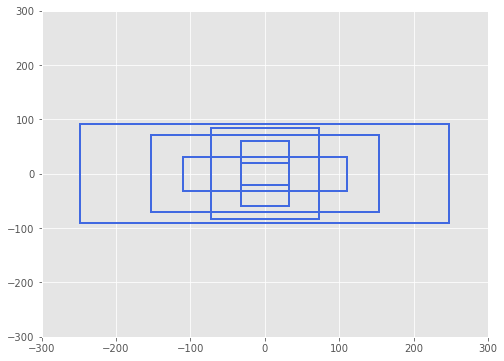

In [55]:
print('[INFO] Visualizing anchors')
w_img, h_img = 600, 600

anchors[:, 0] *= w_img
anchors[:, 1] *= h_img
anchors = np.round(anchors).astype(np.int)

rects = np.empty((best_k, 4), dtype=np.int)
for i in range(len(anchors)):
    w, h = anchors[i]
    x1, y1 = -(w // 2), -(h // 2)
    rects[i] = [x1, y1, w, h]
print(rects)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
for rect in rects:
    x1, y1, w, h = rect
    rect1 = Rectangle((x1, y1), w, h, color='royalblue', fill=False, linewidth=2)
    ax.add_patch(rect1)
plt.xlim([-(w_img // 2), w_img // 2])
plt.ylim([-(h_img // 2), h_img // 2])

plt.show()